In [1]:
import scipy.special as sp
import numpy as np
import uproot
import csv
import matplotlib.pyplot as plt
import pandas as pd

import Utilities.Constants as Constants
import Utilities.Functions as Functions
from Utilities.ipython_exit import exit

print("Success")

Success


## Equation to replicate
The first attempt comes from an equation in the HNL to e+e- recast of HPS decays in MicroBooNE paper: https://arxiv.org/abs/2106.06548

This has an equation for Majorana HNLs with the HNL mass << muon mass.

In [2]:
s_W_squared = 0.231 #sin squared Weinberg, Taken from Wikipedia, rough
G_F = 1.1663787e-5 #GeV-2 Fermi couplingconst, Taken from Jinst

In [5]:
# Define a function here, which takes the variables U_mu4 and HNL mass.
# Doing all in GeV

N_mass = 0.1 #100 MeV
U_mu4 = 1e-4
Decay_width = (2*(G_F**2)*(U_mu4**2)*(N_mass**5)/(768*np.pi**3))*(1-4*s_W_squared+8*s_W_squared**2)

print(Decay_width)

5.746052508123807e-28


## Genie HNL generator comparison

In [2]:
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp

def get_ratio(arr1,arr2):
    ratio = np.divide(np.array(arr1), np.array(arr2))
    return ratio

In [3]:
cols = ['Mass','Value']
Davide_ee = pd.read_csv("Branching_ratios/Davide_ee_mu_like.csv",names=cols)
Davide_pi0 = pd.read_csv("Branching_ratios/Davide_pi0_mu_like.csv",names=cols)

In [13]:
#Dirac BRs etc.
cols_pawel = ["mass",  "BR e+e-",  "BR nu pi0"]
Pawel_BRs = pd.read_csv("Branching_ratios/brs_dirac_um4.Pawel.csv",names=cols_pawel, sep=" ")

filename = "Branching_ratios/brs_dirac_mu.GENIE.txt"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel_dirac = []
pi0_channel_dirac = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list_dirac = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+3) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel_dirac.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel_dirac)
        mass_list_dirac.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+2) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel_dirac.append(br_value)

    counter += 1
        # print(br_value)
print(counter)
print(len(eplus_eminus_channel_dirac))
print(len(pi0_channel_dirac))

1999
500
500


In [17]:
print(len(Pawel_BRs["mass"]))
print(len(mass_list_dirac))

388
500


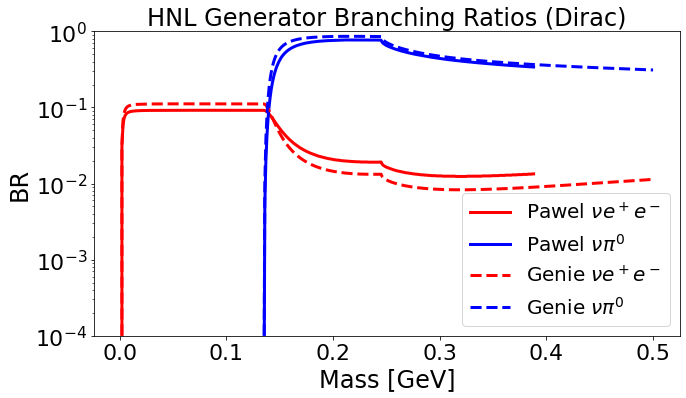

In [16]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR e+e-"], label = r"Pawel $\nu e^+e^-$", lw=3, color = colour_ee)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR nu pi0"], label = r"Pawel $\nu\pi^0$", lw=3, color = colour_pi0)
plt.plot(mass_list_dirac, eplus_eminus_channel_dirac, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
plt.plot(mass_list_dirac, pi0_channel_dirac, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
plt.ylabel("BR", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=20, loc="lower right")
plt.tight_layout()

savename = "Dirac_HNL_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

In [81]:
# 6000 lines in this file from Pawel 
filename = "../Genie_HNLGen/SCAN.log"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel = []
pi0_channel = []

lifetimes = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+8) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel)
        mass_list.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+7) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel.append(br_value)
    if ("lifetime" in line) and ((counter+9) % 12 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetimes.append(lifetime_val)
    counter += 1
        # print(br_value)


## Plotting the Branching ratios

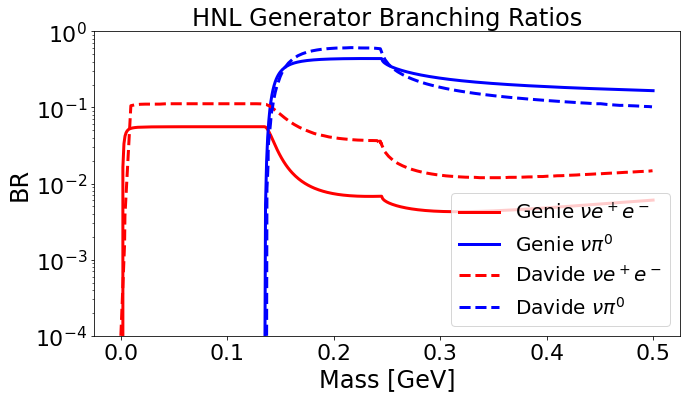

In [80]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Branching Ratios (Majorana)", fontsize=24)
plt.plot(mass_list, eplus_eminus_channel, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee)
plt.plot(mass_list, pi0_channel, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0)
plt.plot(Davide_ee['Mass'], Davide_ee['Value'], label = r"Davide $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
plt.plot(Davide_pi0['Mass'], Davide_pi0['Value'], label = r"Davide $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
plt.ylabel("BR", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=20, loc="lower right")
plt.tight_layout()

savename = "Majorana_HNL_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

## Make ratio of BRs

Text(0, 0.5, '% difference ee channel')

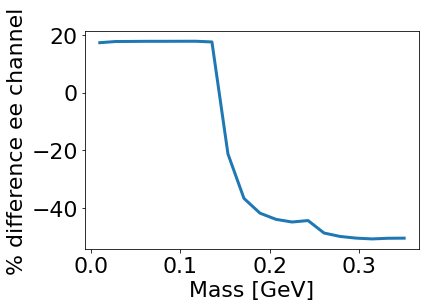

In [25]:
x_vals = np.linspace(0.01, 0.35, 20)
BR_Genie_interp = get_interpolated_vals(mass_list_dirac, eplus_eminus_channel_dirac, x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_BRs['mass'], Pawel_BRs["BR e+e-"], x_vals)
ratio = get_ratio(BR_Pawel_interp,BR_Genie_interp)
perc_diff = []
for i in ratio:
    perc_diff = (1-ratio)*100

# plt.plot(x_vals,ratio)
plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("% difference ee channel")
# plt.xlim(0,0.1)
# plt.ylim(1.8,2.2)

In [ ]:
x_vals = np.linspace(0.01, 0.5, 40)
BR_Genie_interp = get_interpolated_vals(mass_list, eplus_eminus_channel, x_vals)
BR_Davide_interp = get_interpolated_vals(Davide_ee['Mass'], Davide_ee['Value'], x_vals)
ratio = get_ratio(BR_Davide_interp,BR_Genie_interp)

plt.plot(x_vals,ratio)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.xlim(0,0.1)
plt.ylim(1.8,2.2)

## Lifetime plot

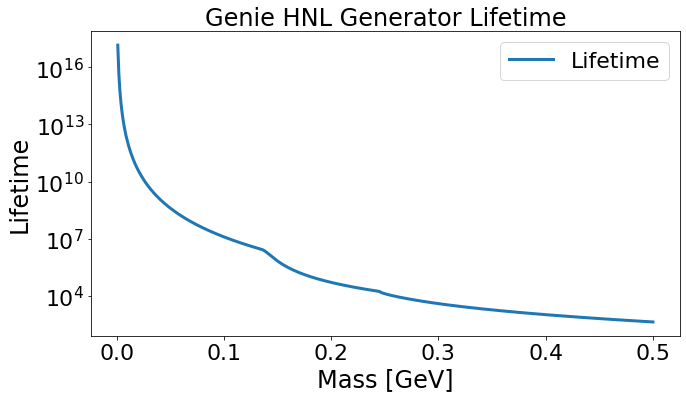

In [41]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Lifetimes", fontsize=24)
plt.plot(mass_list, lifetimes, label = r"Lifetime", lw=3)
# plt.ylim(1e-3,1.0)
plt.ylabel("Lifetime", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=22)
plt.tight_layout()

savename = "Genie_HNL_Gen_lifetime"
plt.savefig("plots/Generator/"+savename+".pdf")